# LAB1 - image information

**objectives:**

* get familiar with development environment
* apply pixel level processing
* entropy and compression


## Image histogram



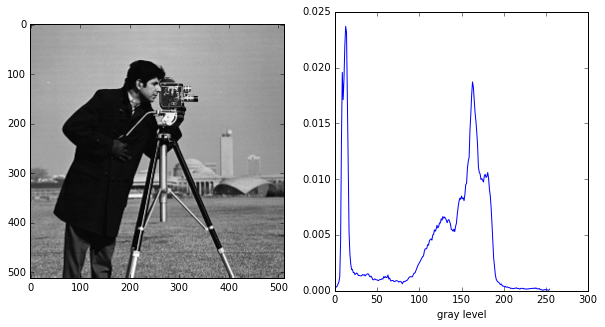

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.data import camera

plt.figure(figsize=[10,5])
ima = camera() #use a test image provided by the skimage library
hist,bins = np.histogram(ima.flatten(),range(256)) # histogram is computed on a 1D distribution --> flatten()
norm_hist = 1.*hist/np.sum(hist) # normalized histogram

# display the results
plt.subplot(1,2,1)
plt.imshow(camera(),cmap=cm.gray)
plt.subplot(1,2,2)
plt.plot(norm_hist)
plt.xlabel('gray level');


starting from the example given above, adress the following questions:

1. what is the average gray value of the cameraman ?
1. what is the average gray value of the sky ?
1. is there more 'cameraman' pixels than 'sky' pixels ?
1. compute and display the cumulated histogram
1. what is the entropy of a shuffled version of the cameraman ?

## Look-up table
* for numpy arrays indexing see [ref](http://docs.scipy.org/doc/numpy/user/basics.indexing.html)

In [9]:
# m is a 3x3 pixels matrix of integers in [0,3]
m = np.array([[1,0,2],[2,1,3],[3,3,1]])
# look-up table is a vector of size 4 mapping the new value for m pixels
lut = np.array([3,2,1,0])

# to map data use numpy vector indexing
new_m = lut[m]

print('data is \n'+str(m))
print('transformed data is \n'+str(new_m))


data is 
[[1 0 2]
 [2 1 3]
 [3 3 1]]
transformed data is 
[[2 3 1]
 [1 2 0]
 [0 0 2]]


The example above illustrate how to map all the value present in an arra $m$ onto the new values given by a look-up table $lut$ which is a simple 1D vector,

starting from this example, answer the following questions:
1. build a LUT for inverting an image
1. build a LUT to keep only graylevel such that $g \ge t$
1. build a LUT that equalize the cameraman graylevel distribution
1. apply these LUT to the cameraman image

## Image entropy
1. Compute image entropy of the cameraman image
$$e = - \sum_{g=0}^N p(g) \log(p(g))$$

1. compute de coocurence matrix for a given displacement $(\Delta x,\Delta y)$
1. what is the entropy of the coocurence matrix ?
1. how this entropy evolve if we increase displacement ?
1. what becomes the entropy of a shuffled version of the cameraman ?

## Image compression

1. decompose an image by recursively subsample its dimensions and computing the reminders allowing the selection the level of recursion (an example is given below)
1. compute how the image entropy evolves w.r.t. the level of decomposition
1. rebuild the original image from the pyramid (allowing the selection the level of recursion)



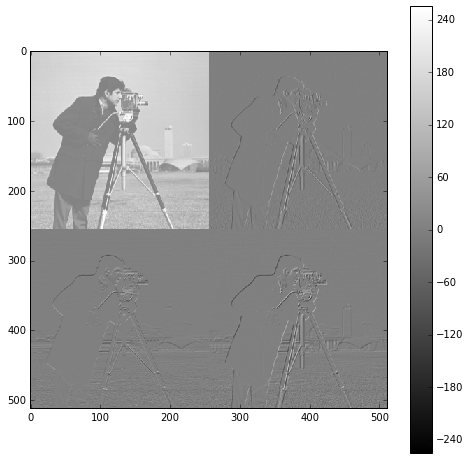

In [10]:
# example of recursive function that subsamble the image
def split(im):
    if im.shape[0] > 256: 
        a = im[0:-1:2,0:-1:2]
        b = im[0:-1:2,1::2]-a
        c = im[1::2,0:-1:2]-a
        d = im[1::2,1::2]-a
        R = np.vstack((np.hstack((split(a),b)),np.hstack((c,d))))
    else:
        R = im
    return R

im = camera().astype(np.float)
s = split(im)

fig = plt.figure(figsize=[8,8])
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()